In [28]:
import plotly.express as px
import numpy as np
import pandas as pd

In [29]:
#Load initial data
dat = pd.read_csv('Covid19_Data.csv', index_col = 0)
dat.index = pd.to_datetime(dat.index)

In [30]:
#Housekeeping to make into multiindex.
col = dat.columns.str.split('_', expand=True)
dat.columns = col
dat.index = dat.index.rename("Date")
dat.columns = dat.columns.rename(['Country', 'Col'])
dat = dat.stack(level=0)

In [31]:
countries = list(dat.columns.get_level_values(0).drop_duplicates())

In [32]:
def get_divide_cols_fn(c1, c2, res):
    def f(df):
        df[res] = df[c1]/df[c2]
        return df
    return f

In [33]:
#Add New Cases, New Tests
dat['NewCases'] = dat.groupby('Country')['Confirmed'].diff()
dat['NewTests'] = dat.groupby('Country')['TotalTests'].diff()
dat['DaysSinceFirst'] = dat.groupby('Country')['Confirmed'].cumcount() + 1

dat = dat.groupby('Country').apply(get_divide_cols_fn("NewCases", "NewTests", "DailyPosTestRate"))
dat = dat.groupby('Country').apply(get_divide_cols_fn("Confirmed", "TotalTests", "CumulativePosTestRate"))
# dat['DaysSince'] = dat.groupby('Country')['Confirmed'].expanding(1).count()
# dat['DailyPosTestRate'] = dat.groupby(level=1)['NewCases']/dat.groupby(level=1)['NewTests']


In [34]:
dat.tail(10)
dat = dat.set_index([dat.index, "DaysSinceFirst"]).reorder_levels(["Country", "DaysSinceFirst", "Date"]).sort_index()

In [35]:
dat.tail(30)

Col                                Confirmed  Dead   Home  Hosp   ICU  \
Country DaysSinceFirst Date                                             
Panama  2              2020-03-10        8.0   0.0    6.0   1.0   1.0   
        3              2020-03-11       14.0   1.0    9.0   3.0   1.0   
        4              2020-03-12       27.0   1.0   21.0   4.0   1.0   
        5              2020-03-13       36.0   1.0   30.0   4.0   1.0   
        6              2020-03-14       43.0   1.0   37.0   3.0   2.0   
        7              2020-03-15       55.0   1.0   44.0   4.0   6.0   
        8              2020-03-16       69.0   1.0   57.0   4.0   7.0   
        9              2020-03-17       86.0   1.0   71.0   6.0   8.0   
        10             2020-03-18      109.0   1.0   91.0   8.0   9.0   
        11             2020-03-19      137.0   1.0  115.0  11.0  10.0   
        12             2020-03-20      200.0   1.0  171.0  17.0  11.0   
        13             2020-03-21      245.0   3.0  208.0  22.0  12.0   
        14             2020-03-22      313.0   3.0  268.0  29.0  13.0   
Peru    1              2020-03-06        1.0   0.0    NaN   NaN   NaN   
        2              2020-03-07        6.0   0.0    NaN   NaN   NaN   
        3              2020-03-08        7.0   0.0    NaN   NaN   NaN   
        4              2020-03-09        9.0   0.0    NaN   NaN   NaN   
        5              2020-03-10       11.0   0.0    NaN   NaN   NaN   
        6              2020-03-11       17.0   0.0    NaN   NaN   NaN   
        7              2020-03-12       22.0   0.0    NaN   NaN   NaN   
        8              2020-03-13       38.0   0.0    NaN   NaN   NaN   
        9              2020-03-14       43.0   0.0    NaN   NaN   NaN   
        10             2020-03-15       71.0   0.0    NaN   NaN   NaN   
        11             2020-03-16       86.0   0.0    NaN   NaN   NaN   
        12             2020-03-17      117.0   0.0    NaN   NaN   NaN   
        13             2020-03-18      145.0   0.0    NaN   NaN   NaN   
        14             2020-03-19      234.0   3.0    NaN   NaN   NaN   
        15             2020-03-20      263.0   4.0    NaN   NaN   NaN   
        16             2020-03-21      318.0   5.0    NaN   NaN   NaN   
        17             2020-03-22      363.0   5.0  329.0  29.0   NaN   

Col                                TotalTests  NewCases  NewTests  \
Country DaysSinceFirst Date                                         
Panama  2              2020-03-10         NaN       7.0       NaN   
        3              2020-03-11         NaN       6.0       NaN   
        4              2020-03-12         NaN      13.0       NaN   
        5              2020-03-13         NaN       9.0       NaN   
        6              2020-03-14         NaN       7.0       NaN   
        7              2020-03-15         NaN      12.0       NaN   
        8              2020-03-16         NaN      14.0       NaN   
        9              2020-03-17         NaN      17.0       NaN   
        10             2020-03-18      1455.0      23.0       NaN   
        11             2020-03-19      1768.0      28.0     313.0   
        12             2020-03-20      2170.0      63.0     402.0   
        13             2020-03-21      2472.0      45.0     302.0   
        14             2020-03-22      3099.0      68.0     627.0   
Peru    1              2020-03-06       155.0       NaN       NaN   
        2              2020-03-07       219.0       5.0      64.0   
        3              2020-03-08       257.0       1.0      38.0   
        4              2020-03-09       318.0       2.0      61.0   
        5              2020-03-10       346.0       2.0      28.0   
        6              2020-03-11       714.0       6.0     368.0   
        7              2020-03-12       905.0       5.0     191.0   
        8              2020-03-13      1232.0      16.0     327.0   
        9              2020-03-14      1545.0       5.0     313.0   
       

# Important Dates by Country:

### Peru
* March 11 - Declaran emergencia sanitaria por 90 dias
* March 13 - Suspenden vuelos internacional desde Europa y Asia
* March 16 - Teletrabajo para todos menos los esenciales
* March 17 - Cierran fronteras
* March 18 - Cuarentena general entre 8PM y 5 AM.

### Panama
* Something

### Guatemala
- Source: Alejandro Giammattei twitter
* March 22 - Cuarentena general entre 4 PM y 4 AM por 8 dias

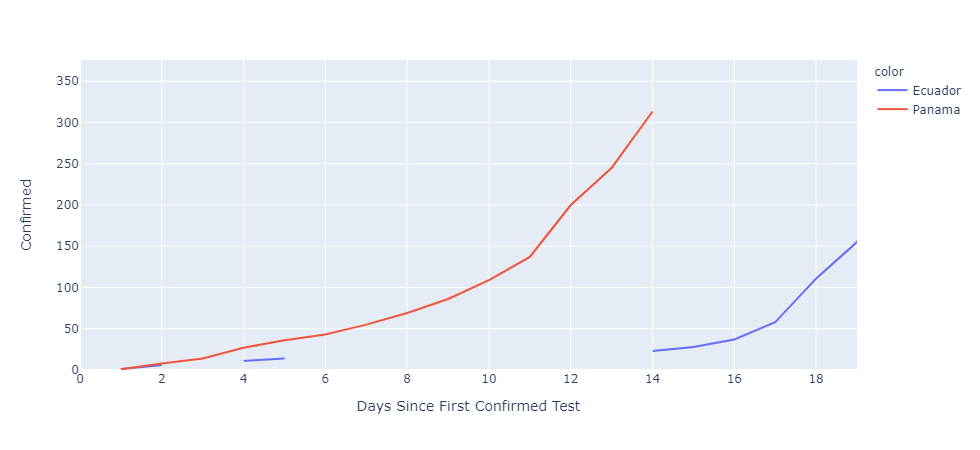

In [118]:
count_to_plot = ['Panama', 'Ecuador']
y_to_plot = 'Confirmed'

to_plot = dat.reset_index(level=[0, 2])
to_plot = to_plot[to_plot.Country.isin(count_to_plot)][['Country'] + [y_to_plot]]


x_lim = to_plot.reset_index().groupby('Country').DaysSinceFirst.max().min() + 5
y_lim = to_plot.reset_index().groupby('Country')[y_to_plot].max().min() * 1.2
# d = dat.loc['Panama'].reset_index(level=1, drop=True)[y_to_plot]
# d

fig = px.line(d, x = to_plot.index, y = to_plot[y_to_plot], color = to_plot.Country)
fig.update_xaxes(range = [0, x_lim], title = 'Days Since First Confirmed Test')
fig.update_yaxes(range = [0, y_lim], title = y_to_plot)

fig.show()


In [119]:
jhu_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
jhu_df = pd.read_csv(jhu_url, error_bad_lines = False)

jhu_df = jhu_df.groupby('Country/Region').sum().drop(['Lat', 'Long'], axis=1)
jhu_df = jhu_df.stack().rename('Confirmed').to_frame()

jhu_df.index = jhu_df.index.rename(['Country', 'Date'])
jhu_df.index = jhu_df.index.set_levels([jhu_df.index.levels[0], pd.to_datetime(jhu_df.index.levels[1])])

jhu_df.loc['Guatemala']

Confirmed
Date                 
2020-01-22          0
2020-01-23          0
2020-01-24          0
2020-01-25          0
2020-01-26          0
...               ...
2020-03-18          6
2020-03-19          9
2020-03-20         12
2020-03-21         17
2020-03-22         19

[61 rows x 1 columns]

In [100]:
pd.__version__

'0.25.3'

In [8]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [10]:
app = dash.Dash()

In [ ]:
app.layout = html.Div('Covid-Tracker')